In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import math

In [2]:
def diagonalized(Q, t):
  (eigenvalues, S) = np.linalg.eig(Q)
  D = np.identity(len(eigenvalues))
  for i in range(len(eigenvalues)):
    D[i,i] = eigenvalues[i]
  P = np.matmul(S, expm(t*D))
  P = np.matmul(P, np.linalg.inv(S))
  return P

In [7]:
## Loop de simulação usando Q. A princípio ignorar
def simulate(Q, max_t, n, t=1, infected=1, history=[]):
  history.append(infected)
  if t>=max_t:
    return history
  P = expm(t*Q)
  new_infected = np.random.choice(range(n), p=P[infected,:])
  return simulate(Q, max_t, n, t+1, new_infected, history)

$\mu_0=\text{Taxa de transmissão de boas notícias, por post, por usuário (recuperação endógena), vou chamar de } \alpha$

$\mu_1=\text{Taxa de transmissão de fake news, por post, por usuário (infecção endógena), aka } \beta$

$\lambda_0=\text{Taxa de recuperação exógena por nó, aka } \gamma$

$\lambda_1=\text{Taxa de infecção exógena por nó, aka } \varepsilon$

$N=\text{Tamanho da população}$

Em $K=1$, vamos usar somente $\mu_1$ e $\lambda_0$.

$b(i)=\frac{\mu_1 i(N-i)}{N} + \lambda_1 (N-i)$

$d(i)=\lambda_0 i + \frac{\mu_0 (N-i)i}{N}$

$
  Q_{i,j} = 
     \begin{cases}
      b(i),\text{ se }j=i+1 \\
      d(i),\text{ se }j=i-1 \\
      1-(b(i)+d(i)),\text{ se }j=i
     \end{cases}
$

In [3]:
beta = 0.5
gamma = 0.1
epsilon = 0
alpha = 0
n = 150
max_t = 50
initial_infected = 10

Q = np.zeros([n+1, n+1])

for i in range(n+1):
  for j in range(n+1):
    b = beta*i*(n-i)/n + epsilon*(n-i)
    d = gamma*i        + alpha*(n-i)*i/n
    if j==i-1:
      Q[i,j]=d
    elif j==i+1:
      Q[i,j]=b

for i in range(n+1):
  Q[i,i] = -sum(Q[i,:])

$P(t) = e^{tQ}$

A função de transição $P(t)$ é usada para calcular o valor esperado de $X_t$.

$E(X_t|X_{t-1}=i) = \sum_{j=1}^{n}{j*P(X_t=j|X_{t-1}=\text{nº infectados inicial})}$

[10, 14.316378960619456, 20.107607195500073, 27.554318616304087, 36.64159042058928, 47.07665778538319, 58.28801374312087, 69.53396340771337, 80.08244639656061, 89.3780310327205, 97.12682345342668, 103.28613287296315, 107.99310535132545, 111.47843245853475, 113.99636791247559, 115.7815801883233, 117.029674060146, 117.8933295970197, 118.48654038971594, 118.89184017538535, 119.16771867100212, 119.35501081553798, 119.48192995976255, 119.56782813991796, 119.62591263148798, 119.66516574405645, 119.69168171661828, 119.70958847918465, 119.72167890346515, 119.72984111218463, 119.73535088754342, 119.73906994353412, 119.74158016939674, 119.74327442936665, 119.74441793554963, 119.74518971102545, 119.74571059296328, 119.74606214113102, 119.74629940326885, 119.74645953253577, 119.74656760423572, 119.74664054207598, 119.7466897679211, 119.74672299047799, 119.74674541242639, 119.74676054499909, 119.74677075797027, 119.74677765071306, 119.74678230262835, 119.74678544219864]


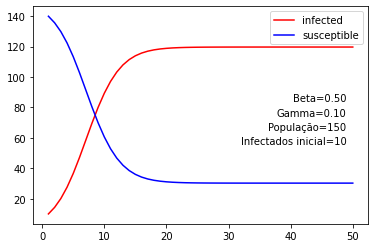

In [5]:
def meanLoop(Q, max_t, n, t=0, initial_infected=1, infected=1, history=[], times=[]):
  history.append(infected)
  times.append(t)
  if t>=max_t:
    return (history, times)
  # P(t) = e^{tQ}
  # A função de transição P(t) é usada para calcular o valor esperado de X_t
  P = expm(t*Q)

  # E(X_t|X_{t-1}=i) = sum{ j*P(X_t=j|X_{t-1}=i) }
  # Aqui, arrendondamos o número atual de infectados (i) porque não existe uma pessoal parcialmente infectada
  terms = [j * P[initial_infected,j] for j in range(n+1)]
  expected_value = sum(terms)

  # Usamos o valor esperado calculado para calcular para t+1
  return meanLoop(Q, max_t, n, t+1, initial_infected, expected_value, history, times)

(history, times) = meanLoop(Q, max_t, n, t=1, initial_infected=initial_infected, infected=initial_infected, history=[])

print(history)
susceptible=[n-i for i in history]

plt.plot(times, history, 'r', label='infected')
plt.plot(times, susceptible, 'b', label='susceptible')
plt.legend()

plt.figtext(0.85, 0.55, "Beta=%.2f" % (beta), ha="right")
plt.figtext(0.85, 0.5, "Gamma=%.2f" % (gamma), ha="right")
plt.figtext(0.85, 0.45, "População=%d" % (n), ha="right")
plt.figtext(0.85, 0.4, "Infectados inicial=%d" % (initial_infected), ha="right")
plt.show()

[1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


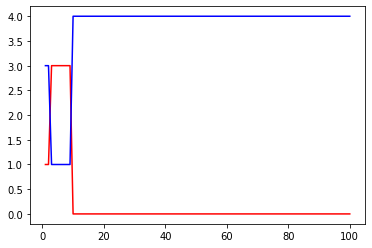

In [55]:
history=simulate(Q, max_t, n, t=1, infected=1, history=[])
print(history)
susceptible=[n-i for i in history]

plt.plot(range(1,max_t+1), history, 'r')
plt.plot(range(1,max_t+1), susceptible, 'b')
plt.show()